In [1]:
import numpy as np
import pandas as pd
import os
from time import time
import errno
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Activation,Dropout

import sklearn
from sklearn.datasets import fetch_lfw_people      ######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV


In [2]:
def copy(src, dest):
    try:
        shutil.copytree(src, dest)
    except OSError as e:
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)
            
src = '../input/'
dest = '../LFW/lfw_home'
copy(src,dest) 

#### copy work is essential

In [3]:
###### read_only_area
print(os.listdir('../input'))
print(os.listdir('../input/lfwpeople'))

###### write_available_area
print(os.listdir('../LFW'))
print(os.listdir('../LFW/lfw_home'))
print(os.listdir('../LFW/lfw_home/lfwpeople'))   

path = '../LWF' 

['lfwpeople']
['pairsDevTrain.txt', 'lfw-funneled.tgz', 'pairsDevTest.txt', 'pairs.txt']
['lfw_home']
['lfwpeople']
['pairs.txt', 'pairsDevTest.txt', 'lfw-funneled.tgz', 'pairsDevTrain.txt']


In [4]:
lfw_dataset=sklearn.datasets.fetch_lfw_people(data_home=path,min_faces_per_person=100,download_if_missing=True)

In [5]:
print(lfw_dataset.images.shape)
print(lfw_dataset.data.shape)
print(lfw_dataset.target_names.shape)
print(lfw_dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(5,)
(1140,)


In [6]:
lfw_dataset.target

array([2, 3, 1, ..., 4, 2, 4])

In [7]:
Name = lfw_dataset.target_names

print(Name)
print(len(Name))

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
5


In [8]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [9]:
X0=lfw_dataset.images
y=lfw_dataset.target

In [10]:
print(X0.shape)
X=X0.reshape(-1,62,47,1)
print(X.shape)

(1140, 62, 47)
(1140, 62, 47, 1)


In [11]:
dataset=[]
testset=[]
t=0
for Xi,yi in zip(X,y):
    img=Xi/255.0
    if t<=200:
        dataset.append([img,yi])
    else:   
        testset.append([img,yi])
    t+=1

In [12]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [13]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [14]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [15]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(160, 62, 47, 1)
(41, 62, 47, 1)
(160, 5)
(41, 5)


In [17]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [18]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(62,47,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [19]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4480)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2294272   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6

In [20]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=1000)

Epoch 1/1000
5/5 [==============================] - 2s 224ms/step - loss: 1.4937 - accuracy: 0.3592 - val_loss: 1.5452 - val_accuracy: 0.3659
Epoch 2/1000
5/5 [==============================] - 0s 79ms/step - loss: 1.3746 - accuracy: 0.4992 - val_loss: 1.6379 - val_accuracy: 0.3659
Epoch 3/1000
5/5 [==============================] - 0s 79ms/step - loss: 1.3604 - accuracy: 0.5027 - val_loss: 1.5315 - val_accuracy: 0.3659
Epoch 4/1000
5/5 [==============================] - 0s 79ms/step - loss: 1.3926 - accuracy: 0.4680 - val_loss: 1.5607 - val_accuracy: 0.3659
Epoch 5/1000
5/5 [==============================] - 0s 76ms/step - loss: 1.3679 - accuracy: 0.4970 - val_loss: 1.6144 - val_accuracy: 0.3659
Epoch 6/1000
5/5 [==============================] - 0s 81ms/step - loss: 1.3584 - accuracy: 0.5088 - val_loss: 1.5306 - val_accuracy: 0.3659
Epoch 7/1000
5/5 [==============================] - 0s 78ms/step - loss: 1.3631 - accuracy: 0.5127 - val_loss: 1.5698 - val_accuracy: 0.3659
Epoch 8/1000

In [21]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.70      0.88      0.78         8
           2       0.86      0.80      0.83        15
           3       0.00      0.00      0.00         4
           4       0.50      0.33      0.40         6

    accuracy                           0.68        41
   macro avg       0.59      0.58      0.58        41
weighted avg       0.69      0.68      0.68        41



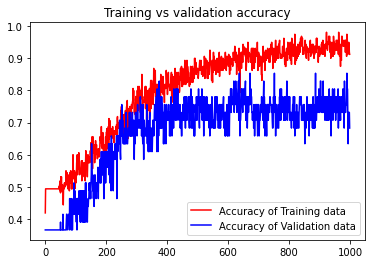

<Figure size 432x288 with 0 Axes>

In [22]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

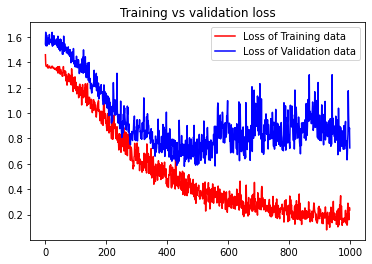

<Figure size 432x288 with 0 Axes>

In [23]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [24]:
def plot_gallery(images, titles, h, w, n_row=1, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

(4, 62, 47, 1)
(4, 2914)


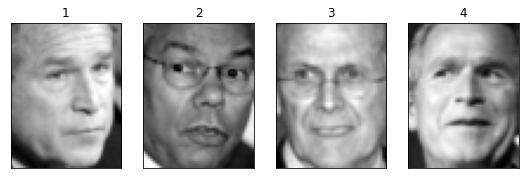

In [25]:
test1=test[0:4].reshape(4,62*47)
plot_gallery(test1,'1234',62,47)
print(test[0:4].shape)
print(test1.shape)

In [26]:
prediction_image=test[0:4]
prediction=model.predict(prediction_image)
print(prediction)

[[5.1918032e-06 1.1485080e-06 9.9998367e-01 6.5963292e-08 9.8660576e-06]
 [1.6821267e-01 1.6701403e-04 8.3022285e-01 9.1979088e-04 4.7770873e-04]
 [1.4683508e-05 9.9893290e-01 2.6598148e-04 2.5150208e-05 7.6133170e-04]
 [2.4439464e-07 3.5019254e-06 9.9966633e-01 3.2982553e-04 6.1615168e-08]]


In [27]:
for i in range(4):
    value=np.argmax(prediction[i])
    name=mapper(value)
    print("Prediction {} is {}.".format(i+1,name))

Prediction 1 is George W Bush.
Prediction 2 is George W Bush.
Prediction 3 is Donald Rumsfeld.
Prediction 4 is George W Bush.


In [28]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(939, 62, 47, 1)
(939, 5)


In [29]:
ANS=tlabels0

In [30]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.751863684771033
